The goal of this notebook is to view scraped Twitter data and plumb limitations of Twitterscraper library. Results below suggest that only a fraction of available tweets are being scraped. The goal of learning/using this library is to bypass Tweepy query limitations to compile a large dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Testing scraper:
df = pd.read_json('coronavirus_tweets3.json')
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,False,[],[],False,True,0,[],1233893632022863872,0,"[{'screen_name': 'HuffPost', 'user_id': '14511...",...,MillenialMatt92,So how do you plan on containing the spreading...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-29 23:59:59,2020-02-29 23:59:59,1233904783833976832,/MillenialMatt92/status/1233904783833976833,350681524,Matthew Cardiel,
1,False,[],[],True,True,0,[],1233887743329083399,1,"[{'screen_name': 'TonyBrunoShow', 'user_id': '...",...,LibertymanNick,I think this Coronavirus outbreak has you over...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-29 23:59:59,2020-02-29 23:59:59,1233904783821430784,/LibertymanNick/status/1233904783821430784,344721343,Libertyman❌🇺🇸🇺🇸🇺🇸,
2,False,"[racist, coronavirus]",[],False,False,1,[https://twitter.com/dorimonson/status/1233866...,,0,[],...,pacificsilver,What a blatantly #racist tweet. How many cases...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-29 23:59:59,2020-02-29 23:59:59,1233904783158738944,/pacificsilver/status/1233904783158738944,25958288,Pacificsilver,
3,False,[],[],False,False,5,[http://bit.ly/2HVXerX],,0,[],...,skift,"As hotel occupancy plunges to a single digit, ...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-29 23:59:59,2020-02-29 23:59:59,1233904782819110912,/skift/status/1233904782819110912,374822255,Skift,
4,False,[],[],False,False,0,[https://buff.ly/2TpdeIw],,0,[],...,MarkFedRecruits,Coronavirus threat halts all construction work...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-29 23:59:59,2020-02-29 23:59:59,1233904782315835392,/MarkFedRecruits/status/1233904782315835392,432158265,Mark Fedyshen,


In [21]:
df.text[-15:]

13769    Isa - 0 \nCovid-19 - 1 \nLa situación me sobre...
13770    COPA AIRLINES REFUERZA SU COMPROMISO CON APOYA...
13771    France Hits Peak\n@business @YahooNews @Yahoo ...
13772    @MattHancock  my wife lost her father to Covid...
13773    In Oct he predicted a debt ‘cancellation’ prog...
13774    ATENÇÃO: Dr.ANTHONY WONG -  VAI CONTAR TUDO HO...
13775    She's had a fun day. On this morning's zoom ab...
13776    This is the reason why US is the leading coron...
13777    With an uptick in conversation around female d...
13778    1-in-7 New Yorkers May Have Already Gotten Cov...
13779    @LesterHoltNBC @NBCNightlyNews \nLester, plasm...
13780    Does sensationalized and alarmist information ...
13781    Kano is hustling more Covid-19 allocation, dey...
13782    jangan ke RS kalo gk genting banget, kenapa?\n...
13783    Some Trump haters rather take the blame being ...
Name: text, dtype: object

In [22]:
#Grouping tweets by daily count
df_day = df.set_index('timestamp').groupby(pd.Grouper(freq='D')).count()
df_day.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
timestamp,,,,,,,,,,,,,,,,,,,,
2019-10-10,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220,220
2019-10-11,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422
2019-10-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-10-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019-10-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df_day.text.describe()

count    225.000000
mean      61.262222
std      177.353958
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      740.000000
Name: text, dtype: float64

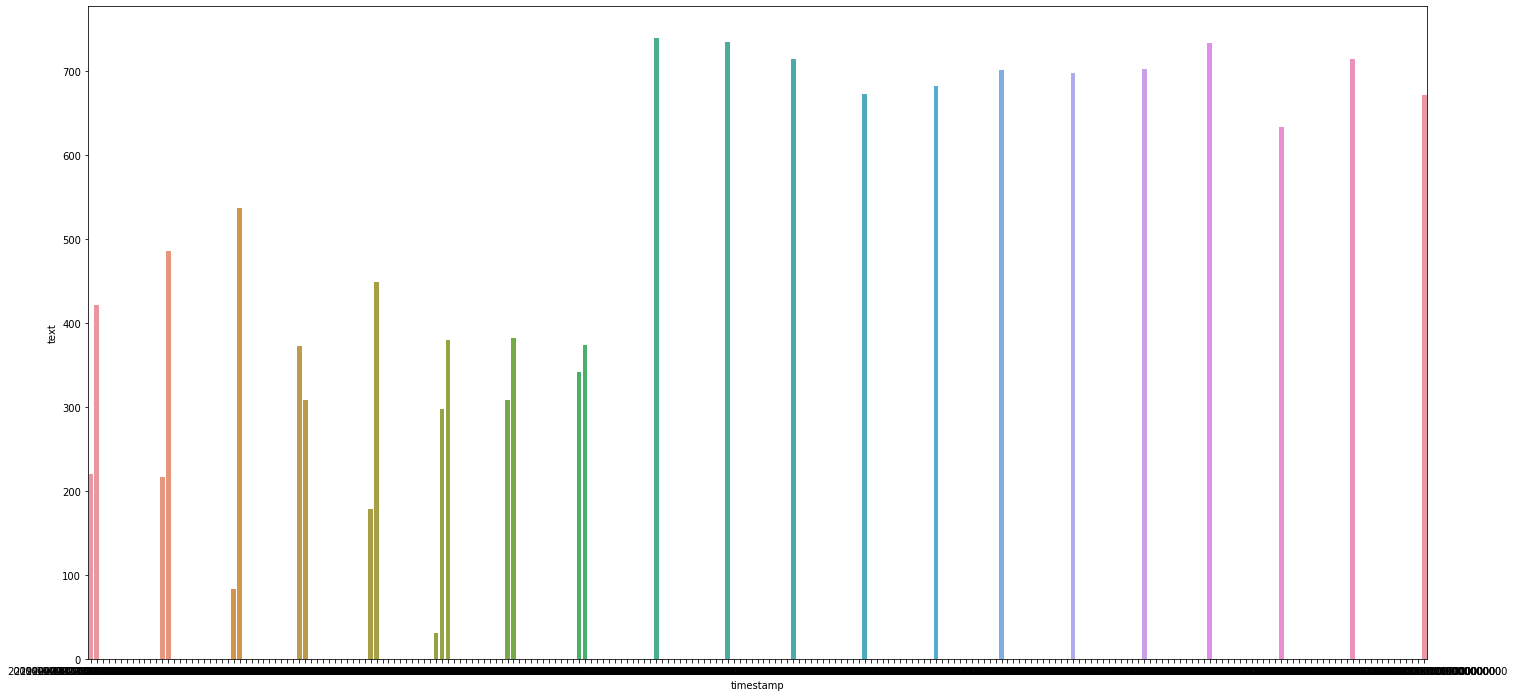

In [24]:
# Plotting tweet freq by day (test):
fig = plt.figure(figsize=(24,12))
sns.barplot(data=df_day, x=df_day.index, y=df_day.text)
plt.show()